# Preparing data
## Import packages

In [54]:
import pandas as pd
import numpy as np
import os as os
from pathlib import Path
from datetime import datetime


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing

import matplotlib.dates as md

## Read file

In [85]:
file_name = 'df_cleaned.pkl'
df_cleaned = pd.read_pickle(file_name)
df_date = df_cleaned.copy()
df_date['mm'] = df_cleaned['yyyymmdd'].dt.month
df_date['dd'] = df_cleaned['yyyymmdd'].dt.day

## Preprocessing

### Reshaping

In [86]:
piv = df_date.pivot_table(index=['mm', 'dd'], values=['TX01', 'PP01', 'WD01', 'WD02', 'PS01'], aggfunc='mean')
piv

PP01        PS01       TX01      WD01        WD02
mm dd                                                       
1  1   3.033212  984.578287  15.856575  4.013205  161.702987
   2   3.432634  984.694668  15.782962  4.001925  164.214006
   3   4.134250  984.633421  15.954871  3.926039  164.511029
   4   3.700182  984.646897  15.869332  4.014167  164.024719
   5   3.440064  984.973208  15.616732  4.172366  162.764447
...         ...         ...        ...       ...         ...
12 27  4.896668  984.127580  16.234128  4.192054  161.438257
   28  3.697907  984.366999  16.077580  4.164698  160.415455
   29  4.617891  984.369297  16.076756  4.095224  164.416465
   30  4.397329  984.278144  16.048959  4.028571  162.452785
   31  3.798719  984.245920  15.917874  4.033536  165.015769

[366 rows x 5 columns]

In [87]:
piv = piv.reset_index(level=[0, 1])

In [88]:
piv['date'] = (
    '2020' + '-' 
    + piv['mm'].astype('string').str.zfill(2) + '-' 
    + piv['dd'].astype('string').str.zfill(2)
)

piv['date'] = pd.to_datetime(piv['date'], format='%Y-%m-%d')
piv = piv.drop(columns=['mm', 'dd'])


df_proc = piv.set_index('date')
df_proc

,PP01,PS01,TX01,WD01,WD02
date,,,,,
2020-01-01,3.033212,984.578287,15.856575,4.013205,161.702987
2020-01-02,3.432634,984.694668,15.782962,4.001925,164.214006
2020-01-03,4.134250,984.633421,15.954871,3.926039,164.511029
2020-01-04,3.700182,984.646897,15.869332,4.014167,164.024719
2020-01-05,3.440064,984.973208,15.616732,4.172366,162.764447
...,...,...,...,...,...
2020-12-27,4.896668,984.127580,16.234128,4.192054,161.438257
2020-12-28,3.697907,984.366999,16.077580,4.164698,160.415455
2020-12-29,4.617891,984.369297,16.076756,4.095224,164.416465


### Dealing with missing values

In [89]:
def getIndexes(dfObj, value):
    ''' Get index positions of value in dataframe i.e. dfObj.'''
    listOfPos = list()
    # Get bool dataframe with True at positions where the given value exists
    result = dfObj.isin([value])
    # Get list of columns that contains the value
    seriesObj = result.any()
    columnNames = list(seriesObj[seriesObj == True].index)
    # Iterate over list of columns and fetch the rows indexes where value exists
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            listOfPos.append((row, col))
    # Return a list of tuples indicating the positions of value in the dataframe
    return listOfPos

In [90]:
findna = df_proc.isna()
getIndexes(findna, True)

[]

Using forward fill here

In [91]:
df_proc = df_proc.fillna(method="ffill")
df_proc

,PP01,PS01,TX01,WD01,WD02
date,,,,,
2020-01-01,3.033212,984.578287,15.856575,4.013205,161.702987
2020-01-02,3.432634,984.694668,15.782962,4.001925,164.214006
2020-01-03,4.134250,984.633421,15.954871,3.926039,164.511029
2020-01-04,3.700182,984.646897,15.869332,4.014167,164.024719
2020-01-05,3.440064,984.973208,15.616732,4.172366,162.764447
...,...,...,...,...,...
2020-12-27,4.896668,984.127580,16.234128,4.192054,161.438257
2020-12-28,3.697907,984.366999,16.077580,4.164698,160.415455
2020-12-29,4.617891,984.369297,16.076756,4.095224,164.416465


### Normalizing

In [92]:
# normalize
x = df_proc.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scaled_data = pd.DataFrame(x_scaled)

# check NaN
scaled_data.isna().sum().sum()
scaled_data

,0,1,2,3,4
0,0.069764,0.971549,0.068933,0.780061,0.189282
1,0.097195,0.979350,0.062715,0.773767,0.234618
2,0.145380,0.975244,0.077235,0.731425,0.239980
3,0.115569,0.976148,0.070010,0.780597,0.231200
4,0.097706,0.998020,0.048675,0.868866,0.208446
...,...,...,...,...,...
361,0.197740,0.941339,0.100822,0.879852,0.184503
362,0.115413,0.957387,0.087600,0.864588,0.166036
363,0.178594,0.957541,0.087530,0.825824,0.238273
364,0.163447,0.951431,0.085182,0.788635,0.202819


# PCA

In [93]:
pca = PCA()
scores = pca.fit_transform(scaled_data)

## Choosing the number of components
#### variance

In [94]:
pca.explained_variance_ratio_

array([0.8414538 , 0.10091773, 0.03882364, 0.01751568, 0.00128916])

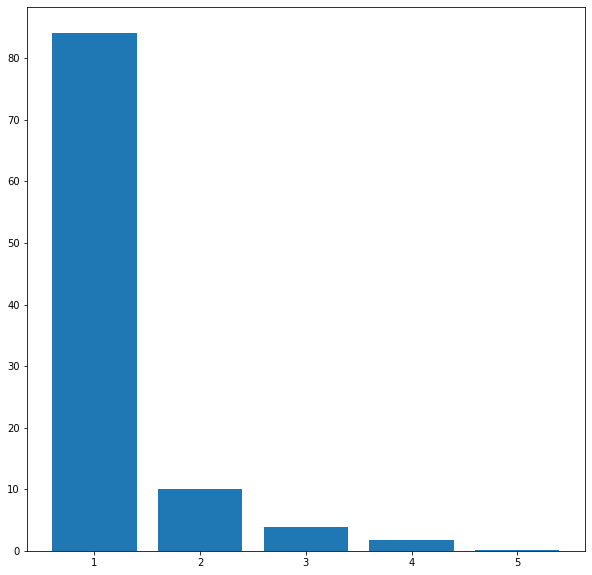

In [95]:
plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = [str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.show()

#### cumulative variance plot

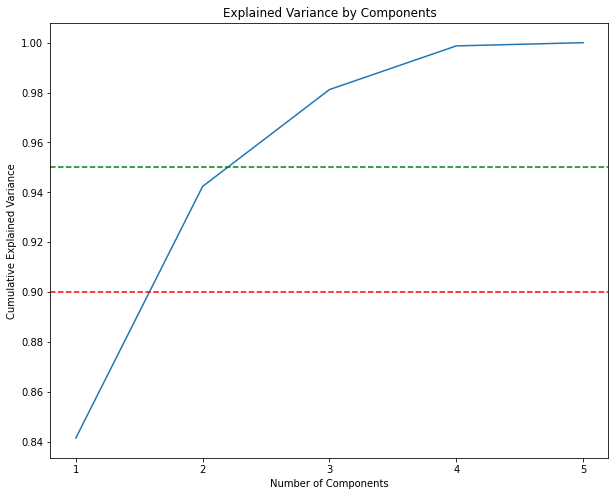

In [96]:

plt.figure(figsize=(10,8))
plt.plot(np.arange(1, 6, 1), pca.explained_variance_ratio_.cumsum(), linestyle = '-')
plt.xticks(np.arange(1, 6, 1))
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

plt.axhline(y=0.9, linestyle='--', color='r')
plt.axhline(y=0.95, linestyle='--', color='g')

In [97]:
pca_n = (pca.explained_variance_ratio_.cumsum() < 0.95).sum()
pca_n

2

2 components is the best choice according to the elbow method.


In [98]:
pca = PCA(pca_n)
scores_pca = pca.fit_transform(scaled_data)
scores_pca

array([[-0.82176333, -0.04758706],
       [-0.79958566, -0.07274833],
       [-0.75390653, -0.0680092 ],
       [-0.79272047, -0.05633826],
       [-0.86896531, -0.02371214],
       [-0.79114897, -0.06762873],
       [-0.80370262, -0.04719314],
       [-0.86062597, -0.0164872 ],
       [-0.80611018, -0.13278   ],
       [-0.80877863, -0.15963369],
       [-0.73990275, -0.21397916],
       [-0.79135093, -0.15582972],
       [-0.79746442, -0.10609795],
       [-0.77342496, -0.10477494],
       [-0.80370058, -0.11973056],
       [-0.81576947, -0.14360761],
       [-0.8145445 , -0.11916693],
       [-0.73162358, -0.23660634],
       [-0.76438664, -0.15317993],
       [-0.75336076, -0.16993539],
       [-0.75138808, -0.17538916],
       [-0.74970134, -0.14107211],
       [-0.8296919 , -0.02690464],
       [-0.78419103, -0.14745062],
       [-0.78049258, -0.15601928],
       [-0.7952002 , -0.06882275],
       [-0.80216403, -0.10524962],
       [-0.65491524, -0.22915242],
       [-0.63257844,

# Clustering
## Choosing the number of clusterings

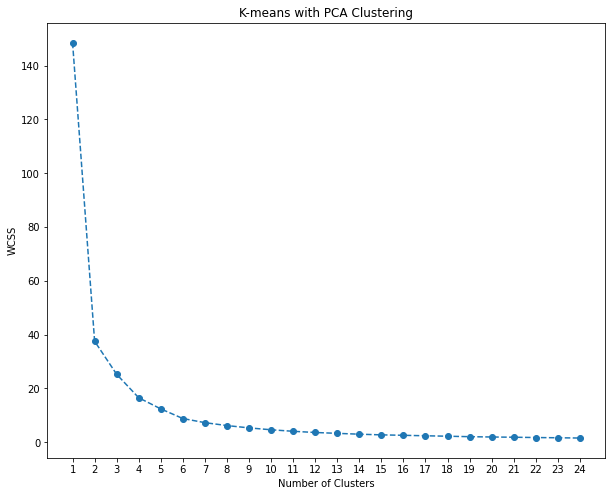

In [99]:
# We fit K means using the transformed data from the PCA.
wcss = []
for i in range(1,25):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 10)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
    
plt.figure(figsize= (10,8))
plt.plot(range(1, 25), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.xticks(np.arange(1, 25, 1))
plt.show()

Using elbow method, 4 clusters is the best choice.

In [100]:
# We have chosen four clusters, so we run K-means with number of clusters equals four.
# Same initializer and random state as before.
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 10)

# We fit our data with the k-means pca model
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=10)

# Results of PCA and K-Means Clustering


In [101]:

# We create a new data frame with the original features and add the PCA scores and assigned clusters.
piv_pca_kmeans = pd.concat([df_proc.reset_index(drop=False), pd.DataFrame(scores_pca)], axis=1)
piv_pca_kmeans.columns.values[-pca_n: ]= ['Component ' + str(x) for x in range(1,(pca_n+1))]
# The Last column we add contains the pca k-means clustering Labels.
piv_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
piv_pca_kmeans

,date,PP01,PS01,TX01,WD01,WD02,Component 1,Component 2,Segment K-means PCA
0,2020-01-01,3.033212,984.578287,15.856575,4.013205,161.702987,-0.821763,-0.047587,1
1,2020-01-02,3.432634,984.694668,15.782962,4.001925,164.214006,-0.799586,-0.072748,1
2,2020-01-03,4.134250,984.633421,15.954871,3.926039,164.511029,-0.753907,-0.068009,1
3,2020-01-04,3.700182,984.646897,15.869332,4.014167,164.024719,-0.792720,-0.056338,1
4,2020-01-05,3.440064,984.973208,15.616732,4.172366,162.764447,-0.868965,-0.023712,1
...,...,...,...,...,...,...,...,...,...
361,2020-12-27,4.896668,984.127580,16.234128,4.192054,161.438257,-0.795331,0.070106,1
362,2020-12-28,3.697907,984.366999,16.077580,4.164698,160.415455,-0.836950,0.033469,1
363,2020-12-29,4.617891,984.369297,16.076756,4.095224,164.416465,-0.771310,-0.004732,1
364,2020-12-30,4.397329,984.278144,16.048959,4.028571,162.452785,-0.771923,-0.004017,1


## Heatmap

In [158]:
plotdata = pd.concat([piv_pca_kmeans[['date']], piv_pca_kmeans[['Segment K-means PCA']]] ,axis=1)
plotdata = plotdata.set_index('date')
plotdata = plotdata.transpose()

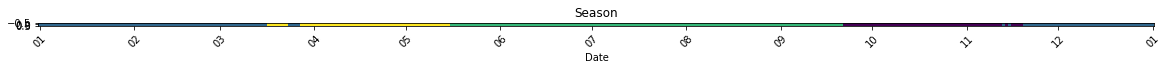

In [161]:


fig, ax = plt.subplots(1, 1, figsize = (20,20))
plt.imshow(plotdata)

# Labelling 
ax.xaxis.set_major_locator(md.MonthLocator())
ax.xaxis.set_major_formatter(md.DateFormatter('%m'))

plt.xticks(rotation=45)
plt.xlabel("Date")
plt.title("Season")

plt.show()

## Visualize Clusters by Components


In [103]:
# # PLot data by PCA components. The Y axis is the first component, X axis is the second.
# x_axis = piv_pca_kmeans['Component 2']
# y_axis = piv_pca_kmeans['Component 1']
# plt.figure(figsize = (10,8))
# sns.scatterplot(x_axis, y_axis, hue = piv_pca_kmeans['Segment K-means PCA']) #, palette =['g', 'r', 'c', 'm']
# plt.title('Clusters by PCA Components')
# plt.show()

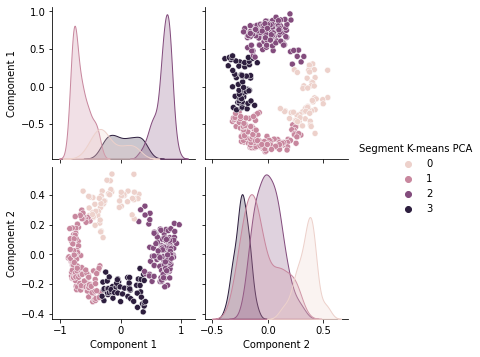

In [105]:
sns.pairplot(piv_pca_kmeans.iloc[:,- (pca_n+1):], hue='Segment K-means PCA')

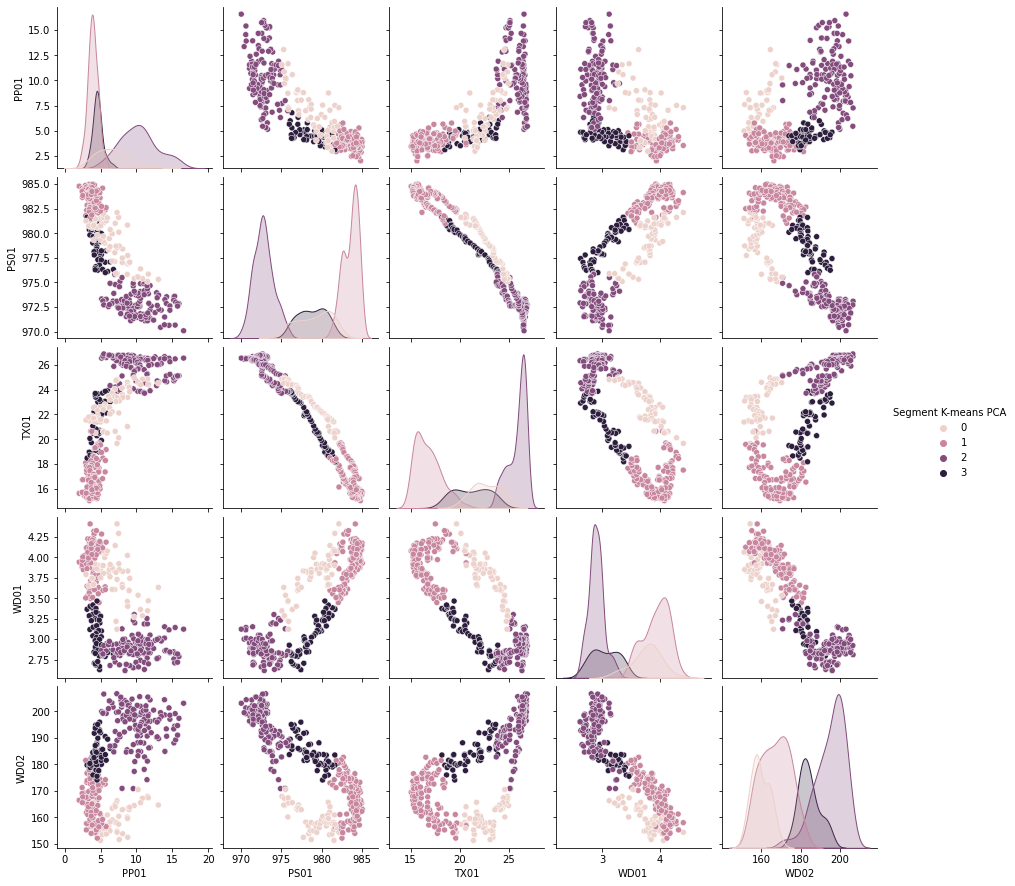

In [125]:
sub = pd.concat([piv_pca_kmeans.iloc[:,1:6], piv_pca_kmeans.iloc[:,-1]], axis=1)
sns.pairplot(sub, hue='Segment K-means PCA')


## Comparison: if we run only the k-means algorithm without PCA

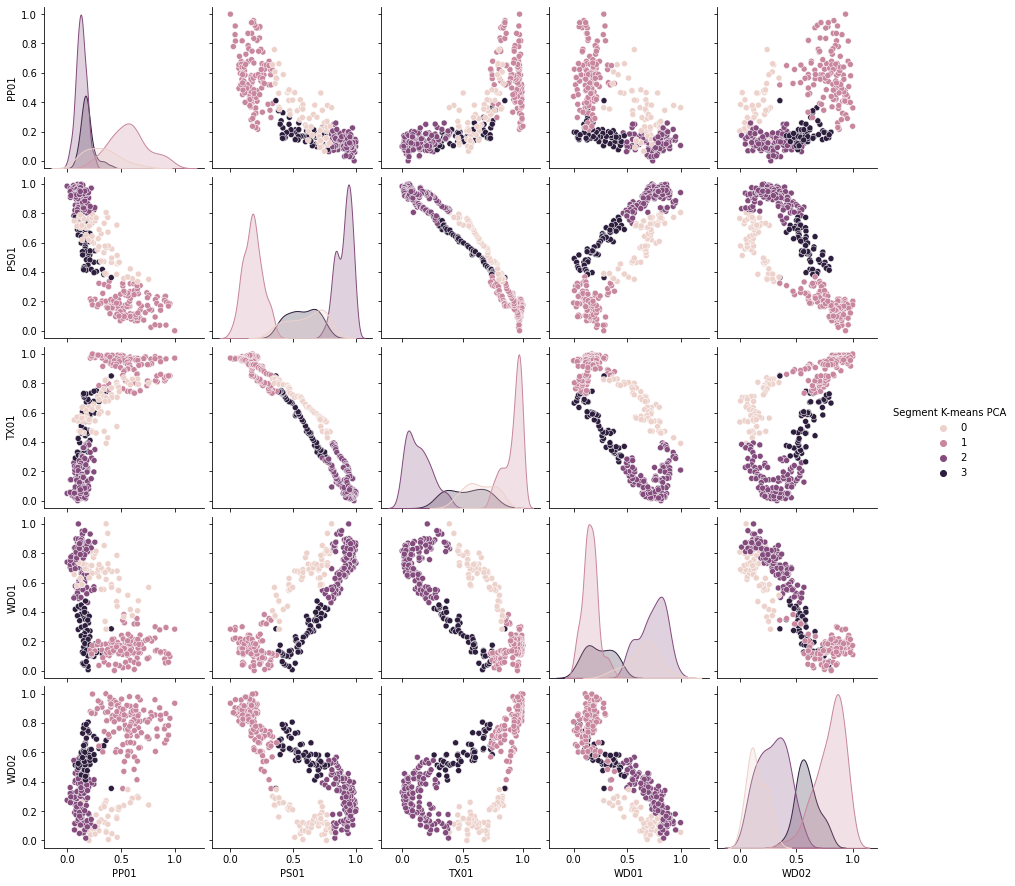

In [115]:
# We have chosen four clusters, so we run K-means with number of clusters equals four.
# Same initializer and random state as before.
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 10)

# We fit our data with the k-means pca model
kmeans.fit(scaled_data)

# We create a new data frame with the original features and add the PCA scores and assigned clusters.
piv_pca_kmeans_comp = scaled_data.copy()
piv_pca_kmeans_comp.columns = df_proc.columns.values
# The Last column we add contains the pca k-means clustering Labels.
piv_pca_kmeans_comp['Segment K-means PCA'] = kmeans.labels_
piv_pca_kmeans_comp

sns.pairplot(piv_pca_kmeans_comp.iloc[:,:6], hue='Segment K-means PCA')

# Interpret PCA

In [107]:
loadings = pd.DataFrame(pca.components_, columns=df_proc.columns) 
loadings

,PP01,PS01,TX01,WD01,WD02
0,0.311738,-0.515603,0.530607,-0.441363,0.400784
1,0.404319,-0.176084,0.442825,0.435020,-0.648216


## Most important features on the PCs (Largest abs)

In [114]:
loadings_abs = loadings.abs()

loadings_abs.apply(lambda x: print(x.sort_values(ascending=False).head(3)), axis=1)

TX01    0.530607
PS01    0.515603
WD01    0.441363
Name: 0, dtype: float64
WD02    0.648216
TX01    0.442825
WD01    0.435020
Name: 1, dtype: float64


0    None
1    None
dtype: object